# Python para Big Data - <span style="color:green">Statsmodels</span>

- É um biblioteca Python que fornece classes e funções para estimativa de diversas funções estatísticas.
    - É útil para realizar testes como ANOVA, ARMA, Series temporais, diversos tipos de regressão.
    - Resultados são testados em razão de pacotes de estatísticas existentes para garantir a precisão.
- Os módulos são originalmente do scipy.stats e foi inicialmente escrito por Jonathan Taylor.
- Como parte do Google Summer of Code 2009, o statsmodels foi testado, melhorado e disponibilizado como pacote.
    - Desde então conta com o suporte do Google e AWR para o desenvolvimento.
    
## Visualizando preços médios de gasolina com Dotplot

Esse notebook apresenta como um dotplot (as vezes chamado de "forest plot") pode ser utilizado para visualizar os preços médios da gasolina e a sua variação nos estados da EUA em três anos consecutivos. Os dados foram coletados da agencia de energia dos EUA.

Esse exemplo de notebook foi adaptado de: http://nbviewer.jupyter.org/urls/umich.box.com/shared/static/oh717lkxczhseep71lao.ipynb

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.dotplots import dot_plot
import numpy as np

O arquivo com os dados está em formato Excel. Para realizar o download do arquivo, acesse: http://www.eia.gov/dnav/pet/xls/PET_PRI_ALLMG_A_EPM0_PTC_DPGAL_M.xls

Para utilizar os dados, carrega com a biblioteca Pandas.

In [2]:
dados = pd.read_excel('dataset1-preco-media-gasolina-estados-eua.xls', "Data 1", skiprows=2)

Os nomes das colunas são grandes, portanto, é necessário processa-los para incluir somente o nome do estado, que aparece no inicio de todos os nomes das colunas.

In [3]:
def tr(x): 
    xs = x.split() 
    # No caso de estados com nome de duas palavras
    if xs[0].lower() in ("new", "north", "south", "rhode", "west"):
        return xs[0] + " " + xs[1]
    # No caso de estados com nomes de uma palavra
    else: 
        return xs[0]

In [4]:
dados = dados.rename(columns=tr)

Agora, vamos remover as colunas que não são estados e realizar alguma limpeza nos dados.

In [5]:
for nm in ("East", "Gulf", "Midwest", "Rocky", "Lower", "U.S.", 
            "Central", "New England", "District", "West Coast"): 
    del dados[nm]

In [6]:
nome_estados = list(dados.columns) 
nome_estados.remove("Date")
nome_estados.sort()
print(nome_estados)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


Agora criamos uma DataFrame que contém a média do preço da gasolina e o mínimo e máximo do preço para cada estado em cada ano.

In [7]:
dfs = []
for year in 2008,2009,2010:
     
    ii = [i for i in dados.index if str(year) in str(dados.loc[i, "Date"])] 
    mn = dados.loc[ii,nome_estados].mean(0)
    ucd = dados.loc[ii,nome_estados].max(0) - mn 
    lcd = mn - dados.loc[ii,nome_estados].min(0) 
 
    df1 = pd.DataFrame({"Gas": mn, "ival1": lcd, "ival2": ucd, 
                        "State name": mn.index}) 
    df1["Year"] = year 
    dfs.append(df1)
       
df = pd.concat(dfs, axis=0, ignore_index=True)
df.head()

,Gas,State name,ival1,ival2,Year
0,2.768417,Alabama,1.578417,0.758583,2008
1,3.357667,Alaska,1.096667,0.839333,2008
2,2.791500,Arizona,1.533500,0.845500,2008
3,2.642727,Arkansas,1.516727,0.840273,2008
4,2.899333,California,1.622333,0.968667,2008


Agora podemos utilizar o dot_plot nesses dados. Os intervalos representam uma séries de preços dentro de um ano em um determinado estado.

(0, 4)

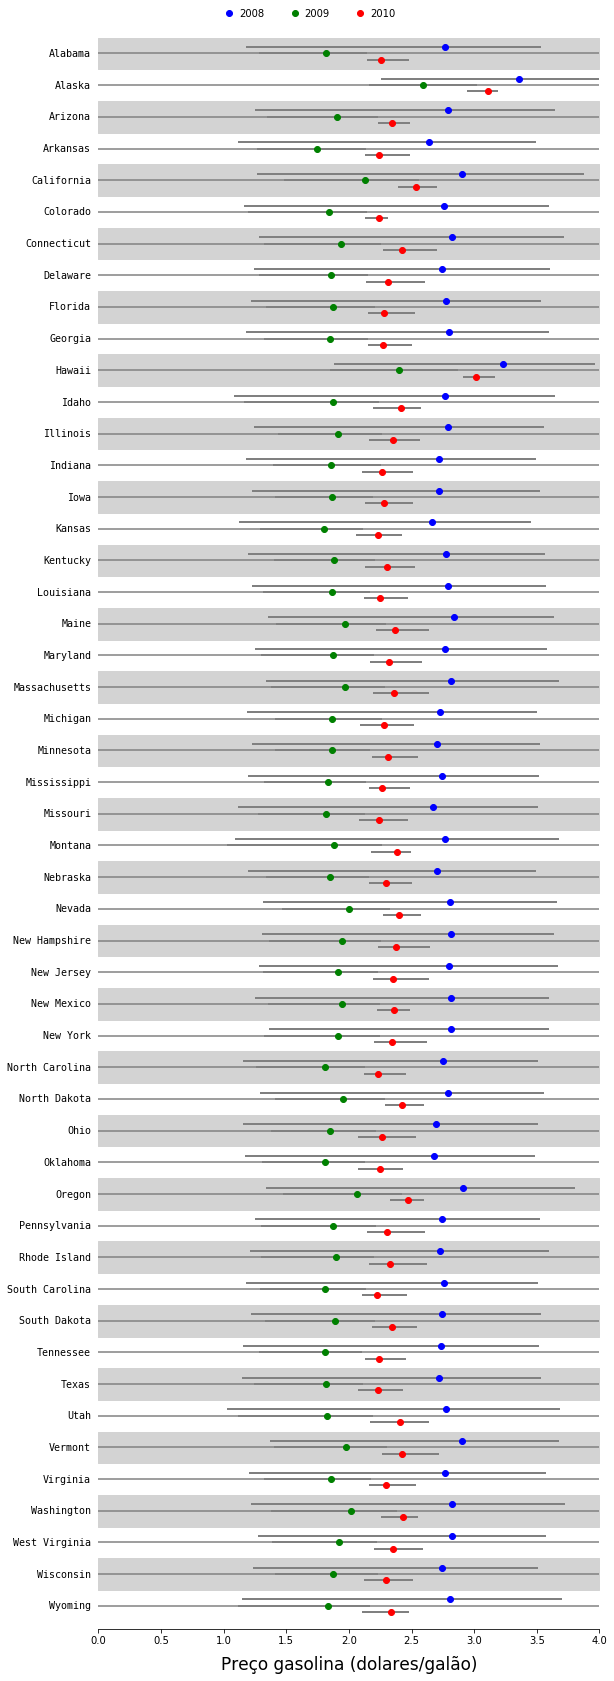

In [8]:
fig = plt.figure(figsize=(8,25))

ax = plt.axes([0.1, 0.1, 0.87, 0.88])

fig.add_axes(ax)

dot_plot(points=df["Gas"], intervals=(df[["ival1", "ival2"]]), ax=ax, 
    lines=df["State name"], styles=df["Year"], stacked=True, striped=True)

handles, labels = ax.get_legend_handles_labels() 

leg = plt.figlegend(handles, labels, "upper center",
        ncol=3, numpoints=1, handletextpad=0.0001) 

leg.draw_frame(False)

ax.set_xlabel("Preço gasolina (dolares/galão)", labelpad=10, size=17) 

plt.xlim(0, 4)

No gráfico acima, os estados estão ordenados alfabeticamente. Também podemos ordenalos pelo preço médio da gasolina. Para fazer isso, temos:

In [9]:
gas = df[["Gas", "State name"]].groupby("State name")
gas = gas["Gas"].agg(np.mean)
ii = np.argsort(gas)
line_order = [gas.index[i] for i in ii]

Agora é só utilizar o dot_plot ordenado pela média.

(0, 4)

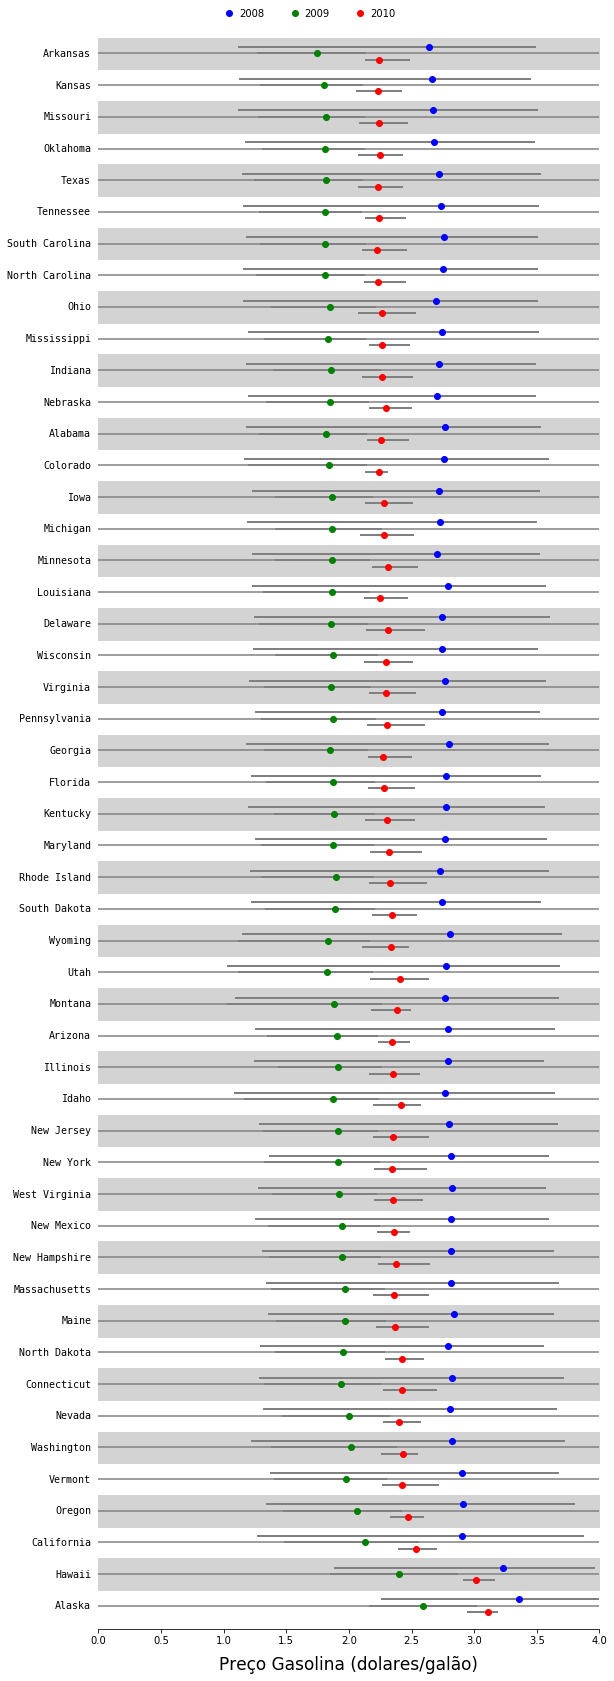

In [10]:
fig = plt.figure(figsize=(8,25))

ax = plt.axes([0.1, 0.1, 0.87, 0.88])

fig.add_axes(ax)

dot_plot(points=df["Gas"], intervals=(df[["ival1", "ival2"]]), ax=ax, 
    lines=df["State name"], styles=df["Year"], stacked=True, striped=True,
    line_order=line_order)

handles, labels = ax.get_legend_handles_labels() 

leg = plt.figlegend(handles, labels, "upper center",
        ncol=3, numpoints=1, handletextpad=0.0001) 

leg.draw_frame(False)

ax.set_xlabel("Preço Gasolina (dolares/galão)", labelpad=10, size=17) 

plt.xlim(0, 4)

Podemos fazer algumas observações baseado nesses gráficos: 
- Em cada estado, o preço do gás foi mais alto em 2008 e mais baixo em 2009
- Existe uma variação baixa do preço em 2008 e muito alta em 2009
- A variação entre estados dentro de um ano é refletida na dispersão horizontal dos pontos de uma determinada cor. Essa variação não é muito grande, com exceção de aproximademente 5 estados.
- A distribuição está bastante concentrada no extremo inferior da faixa de preço.
    
Outros exemplos podem ser visualizados em: https://github.com/statsmodels/statsmodels/wiki/Examples#user-contributed-examples